In [2]:
from tensorflow import convert_to_tensor, Tensor, constant

In [3]:
import os
import sys

In [7]:
imgpaths = {}
pth = './preprocessed_dataset/png'
for d in os.listdir(pth):
    if not os.path.isdir(pth + '/' + d):
        continue
    for img in os.listdir(pth + '/' + d):
        path = './dataset/png/'+ d
        if d not in imgpaths:
            imgpaths[d] = []
        imgpaths[d].append(path + '/' + img)

In [8]:
imgpaths.keys()

dict_keys(['airplane', 'alarm clock'])

In [9]:
imgpaths['airplane']

['./dataset/png/airplane/1.png',
 './dataset/png/airplane/10.png',
 './dataset/png/airplane/11.png',
 './dataset/png/airplane/12.png',
 './dataset/png/airplane/13.png',
 './dataset/png/airplane/14.png',
 './dataset/png/airplane/15.png',
 './dataset/png/airplane/16.png',
 './dataset/png/airplane/17.png',
 './dataset/png/airplane/18.png',
 './dataset/png/airplane/19.png',
 './dataset/png/airplane/2.png',
 './dataset/png/airplane/20.png',
 './dataset/png/airplane/21.png',
 './dataset/png/airplane/22.png',
 './dataset/png/airplane/23.png',
 './dataset/png/airplane/24.png',
 './dataset/png/airplane/25.png',
 './dataset/png/airplane/26.png',
 './dataset/png/airplane/27.png',
 './dataset/png/airplane/28.png',
 './dataset/png/airplane/29.png',
 './dataset/png/airplane/3.png',
 './dataset/png/airplane/30.png',
 './dataset/png/airplane/31.png',
 './dataset/png/airplane/32.png',
 './dataset/png/airplane/33.png',
 './dataset/png/airplane/34.png',
 './dataset/png/airplane/35.png',
 './dataset/png/a

In [12]:
from PIL import Image
import cv2

In [13]:
def get_one(filepath):
    v = Image.open(filepath)
    return v

In [14]:
v = get_one(imgpaths['airplane'][0])

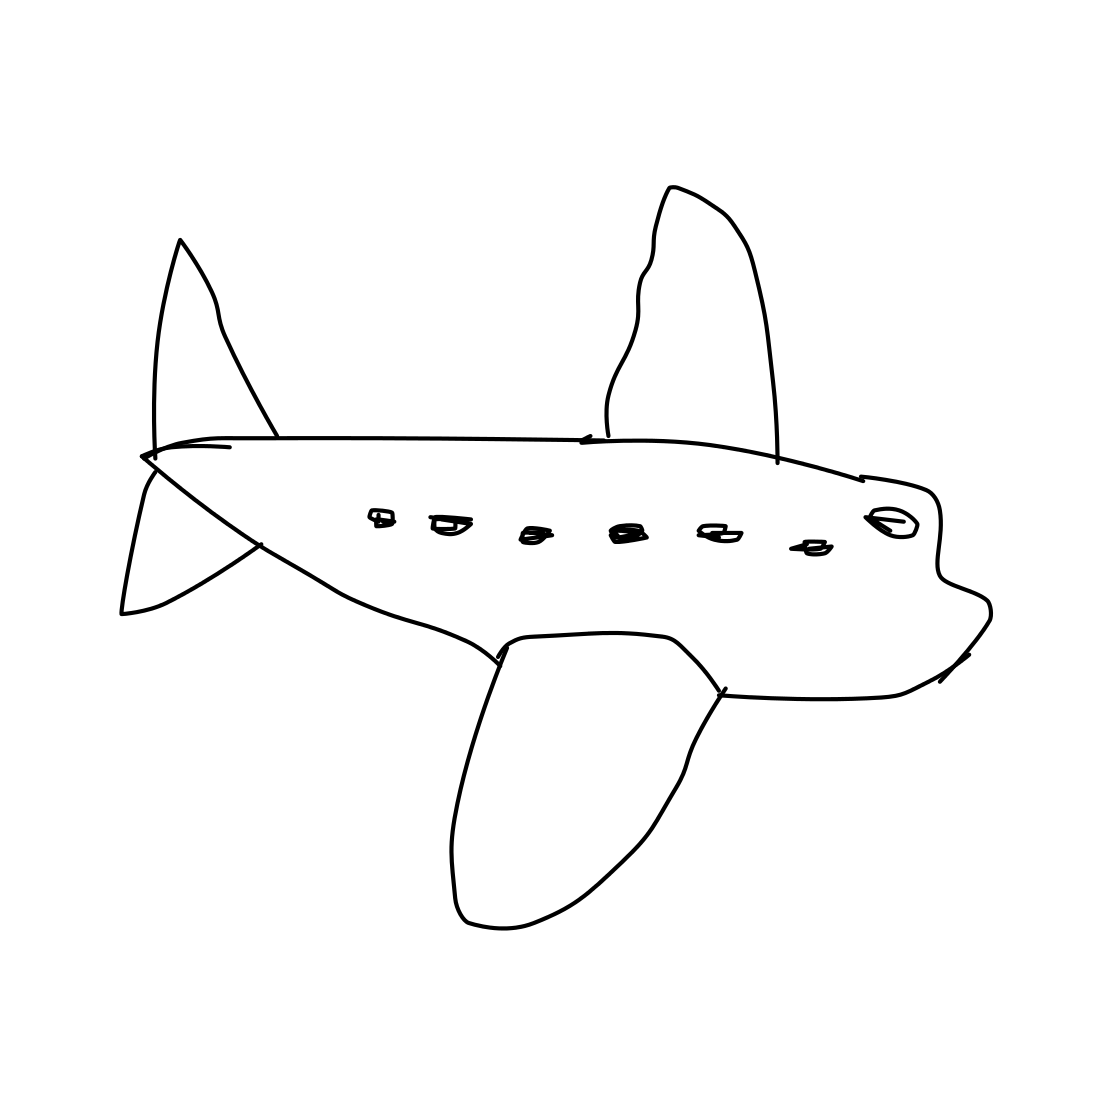

In [15]:
v

In [17]:
from tensorflow.keras.layers import Conv2D

In [53]:
crops = []

In [54]:

def preprocess_chunks(v, filter_size=(7, 7), stride=(7, 7)):
    for i in range(len(v)):
        for j in range(len(v[i])):
            crop = v[i:i+filter_size[0], j:j+filter_size[1]]
            crops.append(crop)
            j += filter_size[1]
            if j > len(v[i]):
                break
        i += filter_size[0]
        if i > len(v):
            break

In [64]:
import matplotlib.pyplot as plt

In [55]:
import numpy as np

In [56]:
preprocess_chunks(np.array(v))

In [57]:
len(crops)

1223236

In [66]:
class DataVisualizer:
    @staticmethod
    def plot(vec, count=1):
        fig, axes = plt.subplots(nrows=1, ncols=4, figsize=[16, 16], dpi=(200))
        for i in range(len(axes)):
            axes[i].imshow(vec[i], cmap=plt.get_cmap('gray'), vmin=0, vmax=255., interpolation="none")
        plt.show()

In [58]:
crops[100000]

array([[255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255]], dtype=uint8)

In [73]:
printable_crops = []

In [ ]:
for i in crops:
    printable = False
    for j in i.flatten():
        if j != 255:
            printable = True
            printable_crops.append(i)

In [ ]:
DataVisualizer.plot([printable_crops[2], printable_crops[3], printable_crops[4], printable_crops[5]])